In [1]:
%cd ..

/mnt/ceph/users/zzhang/CRISPR_pred/crispr_kinn


In [2]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.stats as ss
from sklearn.metrics import average_precision_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import src
import amber

Using TensorFlow backend.


In [3]:
from src import crispr_kinn_predict
from src.crispr_kinn_predict import predict_on_dataframe, plot_dataframe


crispr_kinn_predict.config['kinn_1'] = "outputs/2022-05-21/KINN-wtCas9_cleave_rate_log-finkelstein-0-rep4-gRNA1/"
crispr_kinn_predict.config['kinn_2'] = "outputs/2022-05-21/KINN-wtCas9_cleave_rate_log-finkelstein-0-rep5-gRNA2/"
crispr_kinn_predict.manager_kwargs['output_op'] = lambda: tf.keras.layers.Lambda(lambda x: tf.math.log(x)/np.log(10), name="output_log")

crispr_kinn_predict.config['dcnn_1'] = "outputs/2022-10-15/CNN-wtCas9_cleave_rate_log-rep2-gRNA1/"
crispr_kinn_predict.config['dcnn_2'] = "outputs/2022-10-15/CNN-wtCas9_cleave_rate_log-rep4-gRNA2/"


wd = "/mnt/home/zzhang/ceph/CRISPR_pred/crispr_kinn/"

Kleinstiver et al., Nature 2015 - 5 gRNAs, GUIDE-seq in vivo

100%|██████████| 95829/95829 [00:22<00:00, 4295.03it/s]


                  GUIDE-seq Kleinstiver 2015
auroc.kinn                            0.9775
aupr.kinn                             0.2018
auroc.cnn                             0.8653
aupr.cnn                              0.1447
num.total                         95829.0000
num.unique_gRNAs                      5.0000
num.offtarget                        54.0000


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


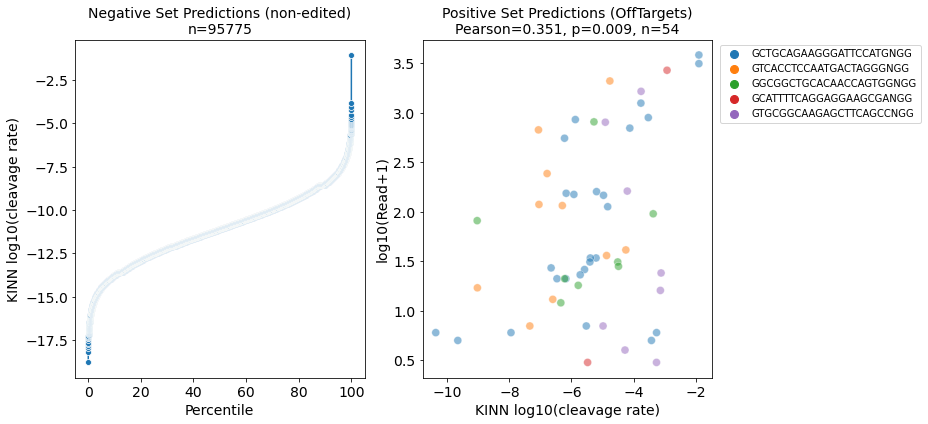

In [4]:
kl_df = pd.read_csv(wd+"baselines/CRISPR_Net/data/Dataset_II_mismatch/dataset_II-5/Kleinstiver_5gRNA_wholeDataset.csv")
kl_df['off_seq'] = kl_df['off_seq'].str.upper()
# mismatch-only data has the same sgRNA_seq and sgRNA_type
kl_df['sgRNA_type'] = kl_df['sgRNA_seq']
kl_df, feat, kl_metrics = predict_on_dataframe(kl_df)
kl_metrics = pd.DataFrame.from_dict(kl_metrics, orient="index", columns=['GUIDE-seq Kleinstiver 2015'])
print(kl_metrics.round(4))
plot_dataframe(kl_df)

Listgarten et al, Nat BME 2018 - GUIDE-seq in vivo - Mismatch Only

100%|██████████| 383463/383463 [01:31<00:00, 4194.28it/s]


                  GUIDE-seq Listgarten 2018
auroc.kinn                           0.9695
aupr.kinn                            0.0786
auroc.cnn                            0.8893
aupr.cnn                             0.0813
num.total                       383463.0000
num.unique_gRNAs                    22.0000
num.offtarget                       56.0000


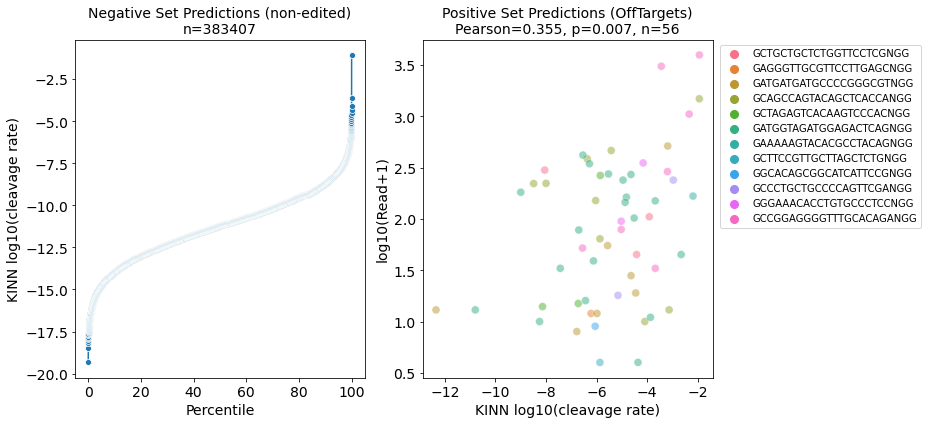

In [5]:
ls_df = pd.read_csv(wd+"baselines/CRISPR_Net/data/Dataset_II_mismatch/dataset_II-6/Listgarten_22gRNA_wholeDataset.csv")
ls_df['off_seq'] = ls_df['off_seq'].str.upper()
# mismatch-only data has the same sgRNA_seq and sgRNA_type
ls_df['sgRNA_type'] = ls_df['sgRNA_seq']
ls_df['Read'] = ls_df['read']
ls_df, feat, ls_metrics = predict_on_dataframe(ls_df)
ls_metrics = pd.DataFrame.from_dict(ls_metrics, orient="index", columns=['GUIDE-seq Listgarten 2018'])
print(ls_metrics.round(4))
plot_dataframe(ls_df)

Listgarten et al, Nat BME 2018 - GUIDE-seq in vivo - Indel + Mismatch

100%|██████████| 213943/213943 [00:50<00:00, 4218.52it/s]


                  GUIDE-seq Listgarten 2018 w/ Indel
auroc.kinn                                    0.9844
aupr.kinn                                     0.1031
auroc.cnn                                     0.8863
aupr.cnn                                      0.0616
num.total                                213943.0000
num.unique_gRNAs                             24.0000
num.offtarget                                60.0000


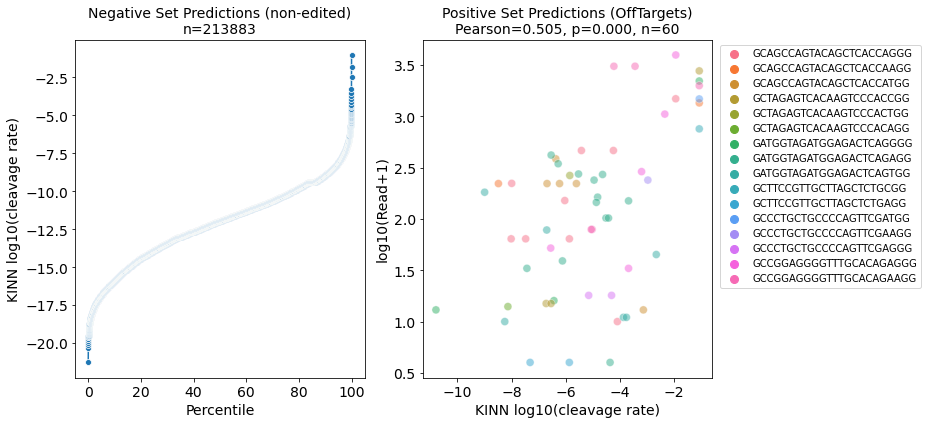

In [6]:
ls2_df = pd.read_csv(wd+"baselines/CRISPR_Net/data/Dataset_I_indel_mismatch/dataset_I-2/elevation_6gRNA_wholeDataset.csv")
ls2_df = ls2_df[['crRNA', 'DNA','label','read']]
ls2_df['sgRNA_type'] = ls2_df['crRNA'].str.replace('-','').str.replace('_','')
ls2_df['Read'] = ls2_df['read']
ls2_df, feat, ls2_metrics = predict_on_dataframe(ls2_df)
ls2_metrics = pd.DataFrame.from_dict(ls2_metrics, orient="index", columns=['GUIDE-seq Listgarten 2018 w/ Indel'])
print(ls2_metrics.round(4))
plot_dataframe(ls2_df)

CIRCLE-seq from Tsai 2017 is Indel+Mismatch, performed in vitro

100%|██████████| 584949/584949 [02:20<00:00, 4156.27it/s]


                  CIRCLE-seq Tsai 2017
auroc.kinn                      0.9097
aupr.kinn                       0.1577
auroc.cnn                       0.6858
aupr.cnn                        0.0766
num.total                  584949.0000
num.unique_gRNAs               10.0000
num.offtarget                7371.0000


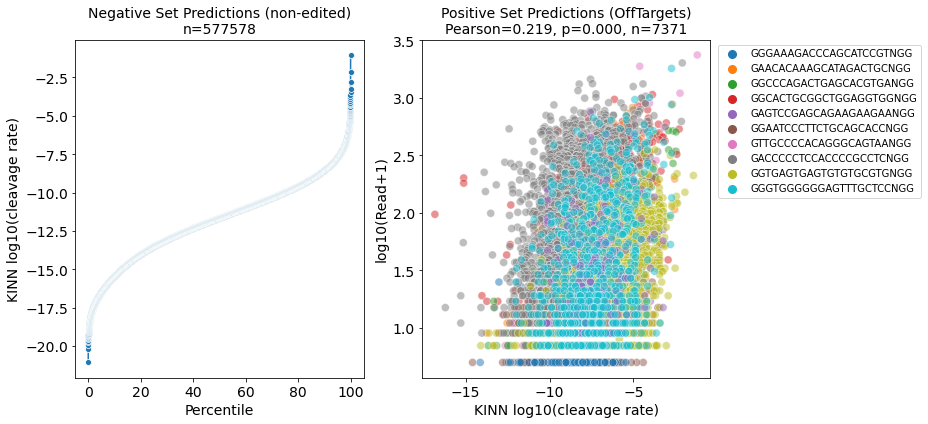

In [7]:
circle = pd.read_csv(wd+"baselines/CRISPR-IP/datas/CIRCLE_seq_10gRNA_wholeDataset.csv")
# is identical
#circle2 = pd.read_csv(wd+"baselines/CRISPR_Net/data/Dataset_I_indel_mismatch/dataset_I-1/CIRCLE_seq_10gRNA_wholeDataset.csv")

circle, feat, circle_metrics = predict_on_dataframe(circle)
circle_metrics = pd.DataFrame.from_dict(circle_metrics, orient="index", columns=['CIRCLE-seq Tsai 2017'])
print(circle_metrics.round(4))
plot_dataframe(circle)

In [8]:
def plot_read_vs_pred(dfs, ax=None, cuts=None, title=''):
    if type(dfs) is not list: dfs = [dfs]
    c = pd.concat(dfs)
    c = c.query('Read>0')

    if cuts is None: cuts = [0, 50, 100, 300, 500, 1000, 1500, 5000]
    c['read_bin'] = pd.cut(c['Read'], cuts)
    
    if ax is None: fig, ax = plt.subplots(1,1, figsize=(5,5))
    sns.pointplot(x='read_bin', y='kinn', color="black", linestyles='-', data=c, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha='right')
    #sns.pointplot(x='read_bin', y='dcnn', color="grey", data=c)
    ax.set_title(title+"\n(n=%i)" % c.shape[0])
    ax.set_xlabel('Off-Target Reads')
    ax.set_ylabel('KINN predicted cleavage rate')
    return ax

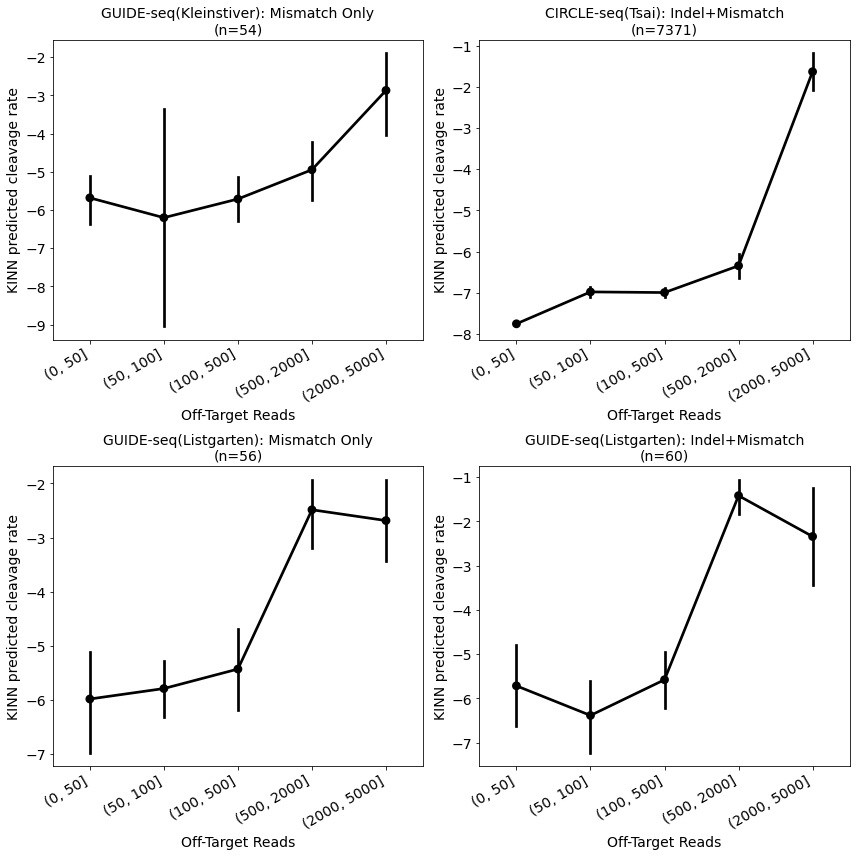

In [9]:
%matplotlib inline
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axs = plt.subplots(2,2, figsize=(12,12))
    plot_read_vs_pred([kl_df], 
                      ax=axs[0,0],
                      cuts=[0, 50, 100, 500, 2000, 5000], 
                      title="GUIDE-seq(Kleinstiver): Mismatch Only")
    plot_read_vs_pred([circle], 
                      ax=axs[0,1],
                      cuts=[0, 50, 100, 500, 2000, 5000], 
                      title="CIRCLE-seq(Tsai): Indel+Mismatch")
    plot_read_vs_pred([ls_df], 
                      ax=axs[1,0],
                      cuts=[0, 50, 100, 500, 2000, 5000], 
                      title="GUIDE-seq(Listgarten): Mismatch Only")
    plot_read_vs_pred([ls2_df], 
                      ax=axs[1,1],
                      cuts=[0, 50, 100, 500, 2000, 5000], 
                      title="GUIDE-seq(Listgarten): Indel+Mismatch")
    fig.tight_layout()

Get previous benchmarking results from R-CRISPR and CRISPR-Net, including methods trained on CRISPOR dataset and other training data of comparable scales to KINN:

In [10]:
baselines = pd.DataFrame({
    'method': ['AttnToMismatch_CNN', 'Elevation-score', 'CFD', 'Ensemble SVM', 'CNN_std', 'CRISPRoff', 'AMBER-KINN', 'AMBER-CNN'],
    'GUIDE_Kleinstiver_aupr': [0.071, 0.131, 0.066, 0.113, 0.115, 0.104] + [kl_metrics.loc['aupr.kinn'].values[0], kl_metrics.loc['aupr.cnn'].values[0]],
    'GUIDE_Listgarten_aupr':  [0.025, 0.078, 0.030, 0.048, 0.034, 0.046] + [ls_metrics.loc['aupr.kinn'].values[0], ls_metrics.loc['aupr.cnn'].values[0]],
}
)

In [11]:
baselines.round(3)

,method,GUIDE_Kleinstiver_aupr,GUIDE_Listgarten_aupr
0,AttnToMismatch_CNN,0.071,0.025
1,Elevation-score,0.131,0.078
2,CFD,0.066,0.030
3,Ensemble SVM,0.113,0.048
4,CNN_std,0.115,0.034
5,CRISPRoff,0.104,0.046
6,AMBER-KINN,0.202,0.079
7,AMBER-CNN,0.145,0.081


In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Dec 14 2022

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.22.0

amber     : 0.1.3
src       : 0.0.3
numpy     : 1.19.5
matplotlib: 3.4.3
pandas    : 1.0.3
scipy     : 1.7.3
tensorflow: 1.15.0
seaborn   : 0.11.1

Watermark: 2.3.1

